In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import os
import time
import random

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
csv_path = "/content/drive/MyDrive/df_after_feat_eng.csv"

In [42]:
data = pd.read_csv(csv_path)
data = data.sample(frac=1, random_state=42)

In [43]:
data.shape

(22125, 169)

In [44]:
list(data.columns)

['name',
 'smiles',
 'mpC',
 'Number of B',
 'Number of C',
 'Number of N',
 'Number of O',
 'Number of F',
 'Number of Si',
 'Number of P',
 'Number of S',
 'Number of Cl',
 'Number of Br',
 'Number of I',
 'S-P (2.0)',
 'N-S (1.0)',
 'Si-O (1.0)',
 'Si-N (1.0)',
 'S-Br (1.0)',
 'O-Si (1.0)',
 'P-S (1.0)',
 'H-C (1.0)',
 'F-P (1.0)',
 'C-B (1.0)',
 'C-S (1.0)',
 'S-Cl (1.0)',
 'F-B (1.0)',
 'N-Si (1.0)',
 'P-C (1.0)',
 'C-O (2.0)',
 'I-O (1.0)',
 'H-O (1.0)',
 'P-Br (1.0)',
 'S-O (1.0)',
 'F-C (1.0)',
 'C-Si (1.0)',
 'N-N (1.5)',
 'N-H (1.0)',
 'S-N (1.5)',
 'N-C (3.0)',
 'Si-Si (1.0)',
 'F-Si (1.0)',
 'P-O (2.0)',
 'P-S (2.0)',
 'N-B (1.0)',
 'Cl-I (1.0)',
 'N-C (2.0)',
 'P-N (1.0)',
 'F-S (1.0)',
 'Si-P (1.0)',
 'C-C (3.0)',
 'Cl-P (1.0)',
 'Br-Br (1.0)',
 'Br-P (1.0)',
 'N-N (2.0)',
 'C-C (1.5)',
 'C-F (1.0)',
 'Cl-Si (1.0)',
 'N-I (1.0)',
 'S-N (1.0)',
 'B-Cl (1.0)',
 'Br-B (1.0)',
 'C-H (1.0)',
 'P-N (2.0)',
 'B-C (1.0)',
 'B-Br (1.0)',
 'O-S (1.0)',
 'B-S (1.0)',
 'C-N (2.0)',
 

<ipython-input-45-f7e3a5f85c81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


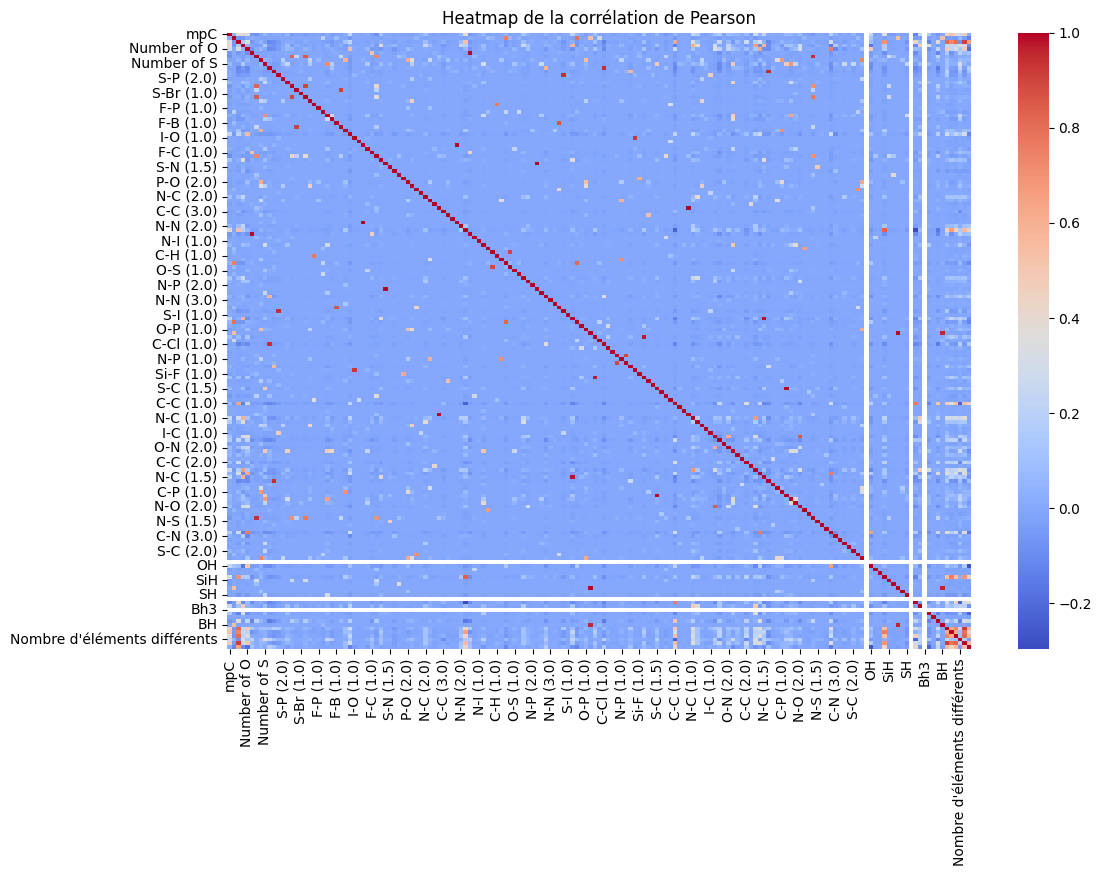

In [45]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", )
plt.title("Heatmap de la corrélation de Pearson")
plt.show()

In [46]:
corr_flat = correlation_matrix.stack().reset_index()
corr_flat.columns = ['Variable1', 'Variable2', 'Correlation']
corr_flat = corr_flat[corr_flat['Variable1'] != corr_flat['Variable2']]
corr_flat['abs_correlation'] = corr_flat['Correlation'].abs()
corr_flat.sort_values('abs_correlation', ascending=False, inplace=True)
top_10_colinear = corr_flat.head(50)
print(top_10_colinear)

                        Variable1                   Variable2  Correlation  \
16939                  P-Si (1.0)                  Si-P (1.0)     1.000000   
7811                   Si-P (1.0)                  P-Si (1.0)     1.000000   
8394                   Br-P (1.0)                  P-Br (1.0)     1.000000   
4971                   P-Br (1.0)                  Br-P (1.0)     1.000000   
11351                   H-N (1.0)                   N-H (1.0)     1.000000   
5809                    N-H (1.0)                   H-N (1.0)     1.000000   
13433                   B-B (1.0)                         Bh2     0.993884   
24517                         Bh2                   B-B (1.0)     0.993884   
874                   Number of F                   C-F (1.0)     0.992788   
8861                    C-F (1.0)                 Number of F     0.992788   
15869                   S-C (1.5)                   C-S (1.5)     0.989908   
20596                   C-S (1.5)                   S-C (1.5)   

In [47]:
threshold = 0.90

corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

data_reduced = data.drop(columns=to_drop)

print(f"Colonnes supprimées : {to_drop}")
print(f"La nouvelle forme de l'ensemble de données est : {data_reduced.shape}")


<ipython-input-47-167a59b372d2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr().abs()


Colonnes supprimées : ['O-Si (1.0)', 'N-Si (1.0)', 'Br-P (1.0)', 'C-F (1.0)', 'H-N (1.0)', 'C-I (1.0)', 'C-Cl (1.0)', 'O-I (1.0)', 'C-O (1.5)', 'P-Si (1.0)', 'N-C (1.5)', 'C-Br (1.0)', 'C-S (1.5)', 'Si-C (1.0)', 'Bh2', 'BH', 'Nombre de doubles liaisons']
La nouvelle forme de l'ensemble de données est : (22125, 152)


<ipython-input-47-167a59b372d2>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [48]:
data_reduced = data_reduced.dropna()
target = data_reduced["mpC"]
numeric_features = data_reduced.select_dtypes(include=[np.number])

features = numeric_features.drop("mpC", axis=1)

In [49]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

pipeline = make_pipeline(RobustScaler(), lgb.LGBMRegressor(random_state=42))

param_grid = {
    'lgbmregressor__n_estimators': [600],
    'lgbmregressor__num_leaves': [51],
    'lgbmregressor__learning_rate': [0.09],
    'lgbmregressor__min_child_samples': [13],
    'lgbmregressor__subsample': [0.9],
    'lgbmregressor__colsample_bytree': [0.9],
    'lgbmregressor__boosting_type': ['gbdt'],
    'lgbmregressor__min_child_weight': [0.001],
    'lgbmregressor__reg_alpha': [0.09],

}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Meilleurs paramètres: {best_params}")

y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE sur l'ensemble de test: {rmse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 19729, number of used features: 90
[LightGBM] [Info] Start training from score 103.286634
Meilleurs paramètres: {'lgbmregressor__boosting_type': 'gbdt', 'lgbmregressor__colsample_bytree': 0.9, 'lgbmregressor__learning_rate': 0.09, 'lgbmregressor__min_child_samples': 13, 'lgbmregressor__min_child_weight': 0.001, 'lgbmregressor__n_estimators': 600, 'lgbmregressor__num_leaves': 51, 'lgbmregressor__reg_alpha': 0.09, 'lgbmregressor__subsample': 0.9}
RMSE sur l'ensemble de test: 41.03865679515054


Meilleurs paramètres: {'lgbmregressor__boosting_type': 'gbdt', 'lgbmregressor__colsample_bytree': 0.9, 'lgbmregressor__learning_rate': 0.09, 'lgbmregressor__min_child_samples': 13, 'lgbmregressor__min_child_weight': 0.001, 'lgbmregressor__n_estimators': 600, 'lgbmregressor__num_leaves': 51, 'lgbmregressor__reg_alpha': 0.09, 'lgbmregressor__subsample': 0.9}
RMSE sur l'ensemble de test: 40.90657431726914

In [50]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline



standard_cols = [
    'Number of B', 'Number of C', 'Number of N', 'Number of O', 'Number of Si',
    'I-O (1.0)', 'C-S (2.0)', 'O-S (1.0)', 'Si-Br (1.0)', 'N-P (2.0)', 'S-N (1.5)',
    'N-I (1.0)', 'C-Si (1.0)', 'Cl-N (1.0)', 'B-C (1.0)', 'I-C (1.0)', 'B-Br (1.0)',
    'N-S (1.0)', 'N-H (1.0)', 'Si-O (1.0)', 'Si-P (1.0)', 'S-I (1.0)', 'S-P (2.0)',
    'N-Br (1.0)', 'P-C (1.0)', 'N-Cl (1.0)', 'H-C (1.0)', 'Br-Si (1.0)', 'P-N (2.0)',
    'Cl-O (1.0)', 'N-O (1.5)', 'I-I (1.0)', 'P-S (2.0)', 'P-Cl (1.0)', 'P-Br (1.0)',
    'N-N (2.0)', 'Cl-Si (1.0)', 'Cl-P (1.0)', 'P-S (1.0)', 'Cl-B (1.0)', 'C-P (2.0)',
    'O-O (1.0)', 'Br-Br (1.0)', 'N-P (1.0)', 'C-O (3.0)', 'F-S (1.0)', 'S-P (1.0)',
    'O-B (1.0)', 'P-F (1.0)', 'S-S (1.0)', 'P-N (1.0)', 'S-Cl (1.0)',
    'S-O (1.0)', 'F-Si (1.0)', 'S-Br (1.0)', 'B-B (1.0)', 'F-P (1.0)', 'N-C (3.0)',
    'S-C (2.0)', 'C-B (1.0)', 'B-N (1.0)', 'F-B (1.0)', 'B-F (1.0)', 'S-F (1.0)',
    'Si-Cl (1.0)', 'O-P (1.0)', 'C-H (1.0)', 'N-N (3.0)', 'B-S (1.0)',
    'Si-Si (1.0)', 'O-C (3.0)', 'O-H (1.0)', 'C-C (1.5)',
    'P-O (2.0)', 'N-B (1.0)', 'H-O (1.0)', 'P-O (1.0)', 'Si-N (1.0)',
    'S-S (1.5)',  'O-S (2.0)', 'Br-B (1.0)', 'B-Cl (1.0)',
    'O-N (1.5)', 'Si-F (1.0)', 'N-S (1.5)', 'B-O (1.0)', 'O-Cl (1.0)', 'O-P (2.0)',
    'Cl-S (1.0)', 'C-P (1.0)', 'CH', 'SiH3', 'SiH', 'PH', 'SiH2', 'NH3', 'PH3',
    'SH', 'Molecular_weight', 'Aromatic Rings Count', 'Main Chain Length',
    "Nombre d'éléments différents", 'XLogP'
]

minmax_cols = [
    'Number of F', 'Number of P', 'Number of S', 'Number of Cl', 'Number of Br',
    'Number of I', 'N-N (1.0)', 'S-O (2.0)', 'C-N (1.5)', 'O-N (1.0)',
    'N-C (1.0)', 'C-O (1.0)', 'C-N (3.0)', 'O-C (1.0)', 'O-C (2.0)', 'O-C (1.5)',
    'S-C (1.0)', 'C-N (2.0)', 'C-N (1.0)', 'Cl-C (1.0)', 'C-C (1.0)',
    'N-O (2.0)', 'O-N (2.0)', 'F-C (1.0)', 'S-N (1.0)', 'C-O (2.0)', 'N-C (2.0)',
    'Br-C (1.0)', 'N-O (1.0)', 'C-S (1.0)',
    'C-C (3.0)', 'N-N (1.5)', 'C-C (2.0)',
    'OH', 'CH2', 'NH2', 'CH3', 'NH'
]

robust_cols = [col for col in features.columns if col not in (standard_cols + minmax_cols)]

preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), standard_cols),
        ('minmax_scaler', MinMaxScaler(), minmax_cols),
        ('robust_scaler', RobustScaler(), robust_cols)
    ],
    remainder='passthrough'
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)


param_grid = {
    'regressor__n_estimators': [751],
    'regressor__num_leaves': [53],
    'regressor__learning_rate': [0.09],
    'regressor__min_child_samples': [13],
    'regressor__subsample': [1],
    'regressor__colsample_bytree': [0.9],
    'regressor__boosting_type': ['gbdt'],
    'regressor__min_child_weight': [0.001],
    'regressor__reg_alpha': [0.09],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Meilleurs paramètres: {best_params}")

y_pred = grid_search.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE sur l'ensemble de test: {rmse}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1251
[LightGBM] [Info] Number of data points in the train set: 19729, number of used features: 90
[LightGBM] [Info] Start training from score 103.286634
Meilleurs paramètres: {'regressor__boosting_type': 'gbdt', 'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.09, 'regressor__min_child_samples': 13, 'regressor__min_child_weight': 0.001, 'regressor__n_estimators': 751, 'regressor__num_leaves': 53, 'regressor__reg_alpha': 0.09, 'regressor__subsample': 1}
RMSE sur l'ensemble de test: 40.835775705108134


Meilleurs paramètres: {'regressor__boosting_type': 'gbdt', 'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.09, 'regressor__min_child_samples': 13, 'regressor__min_child_weight': 0.001, 'regressor__n_estimators': 751, 'regressor__num_leaves': 53, 'regressor__reg_alpha': 0.1, 'regressor__subsample': 1}
RMSE sur l'ensemble de test: 40.98436785330502

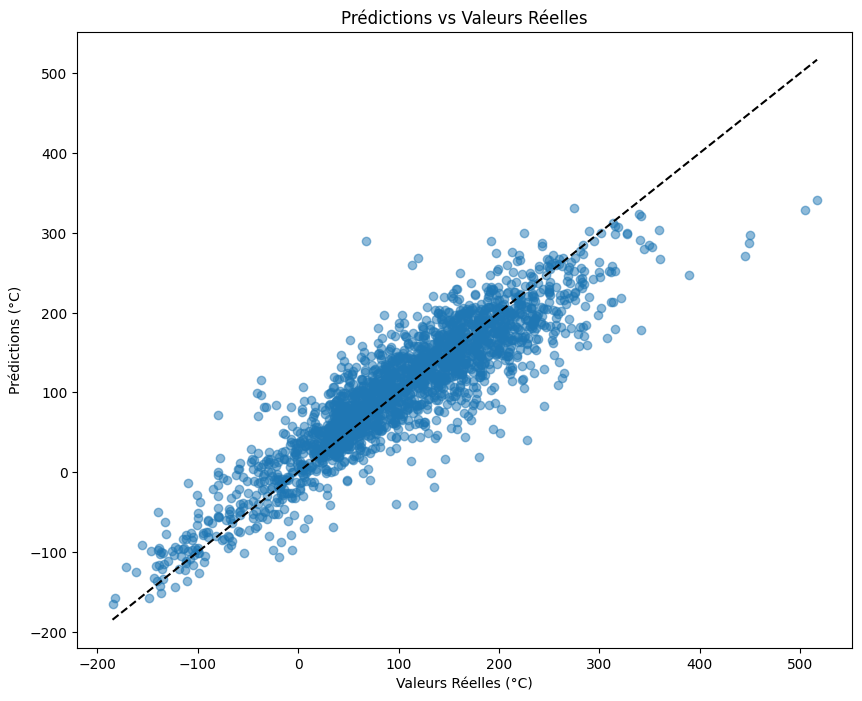

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.title('Prédictions vs Valeurs Réelles')
plt.xlabel('Valeurs Réelles (°C)')
plt.ylabel('Prédictions (°C)')

plt.show()


In [52]:
import pandas as pd

errors = y_test - y_pred

temp_error_df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred, 'Error': errors})

bin_width = 20
bins = range(int(min_val), int(max_val) + bin_width, bin_width)

temp_error_df['Temp_Bin'] = pd.cut(temp_error_df['Real'], bins, right=False)

error_stats = temp_error_df.groupby('Temp_Bin')['Error'].agg(['mean', 'count', 'std'])

error_stats['mean_abs'] = error_stats['mean'].abs()

sorted_errors = error_stats.sort_values('mean_abs', ascending=False)

print(sorted_errors)


                    mean  count        std    mean_abs
Temp_Bin                                              
[495, 515)    176.905199      1        NaN  176.905199
[515, 535)    175.711144      1        NaN  175.711144
[435, 455)    162.786353      3  11.167702  162.786353
[375, 395)    141.922953      1        NaN  141.922953
[355, 375)     75.113385      2  26.960493   75.113385
[335, 355)     64.821854      7  48.757300   64.821854
[295, 315)     61.475769     14  42.054190   61.475769
[255, 275)     52.996626     36  43.250028   52.996626
[275, 295)     51.246506     28  44.194467   51.246506
[315, 335)     49.663162      8  47.481372   49.663162
[235, 255)     36.021459     55  40.101754   36.021459
[-165, -145)  -35.311360      4  31.480077   35.311360
[-185, -165)  -32.740113      3  17.449128   32.740113
[-85, -65)    -29.418536     28  41.574981   29.418536
[-45, -25)    -29.283211     50  45.474223   29.283211
[215, 235)     28.926262     87  39.027512   28.926262
[-145, -12

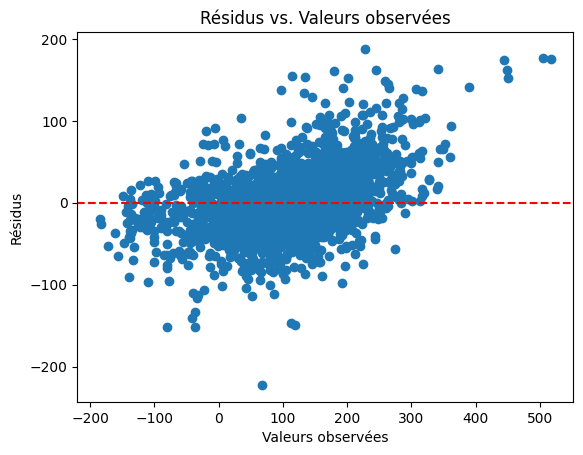

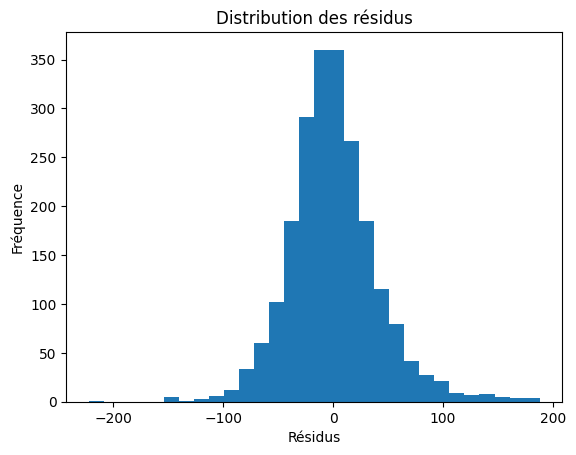

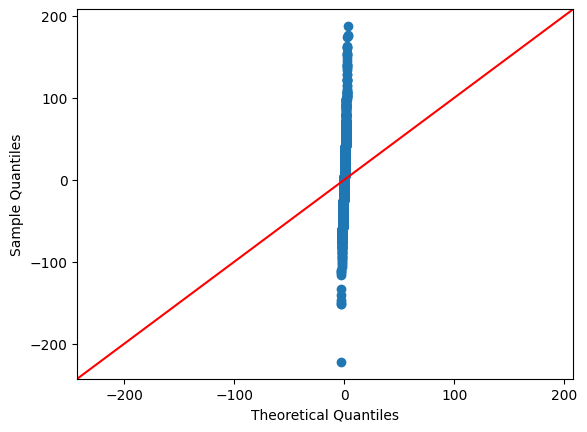

p-value du test de Breusch-Pagan: 4.115456259742936e-07


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant


residus = y_test - y_pred

plt.scatter(y_test, residus)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs observées')
plt.ylabel('Résidus')
plt.title('Résidus vs. Valeurs observées')
plt.show()

plt.hist(residus, bins=30)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des résidus')
plt.show()

sm.qqplot(residus, line ='45')
plt.show()

X_with_constant = add_constant(y_pred.reshape(-1, 1))

# Test de Breusch-Pagan pour l'homoscédasticité
_, pvalue, _, f_pvalue = het_breuschpagan(residus, X_with_constant)
print('p-value du test de Breusch-Pagan:', pvalue)


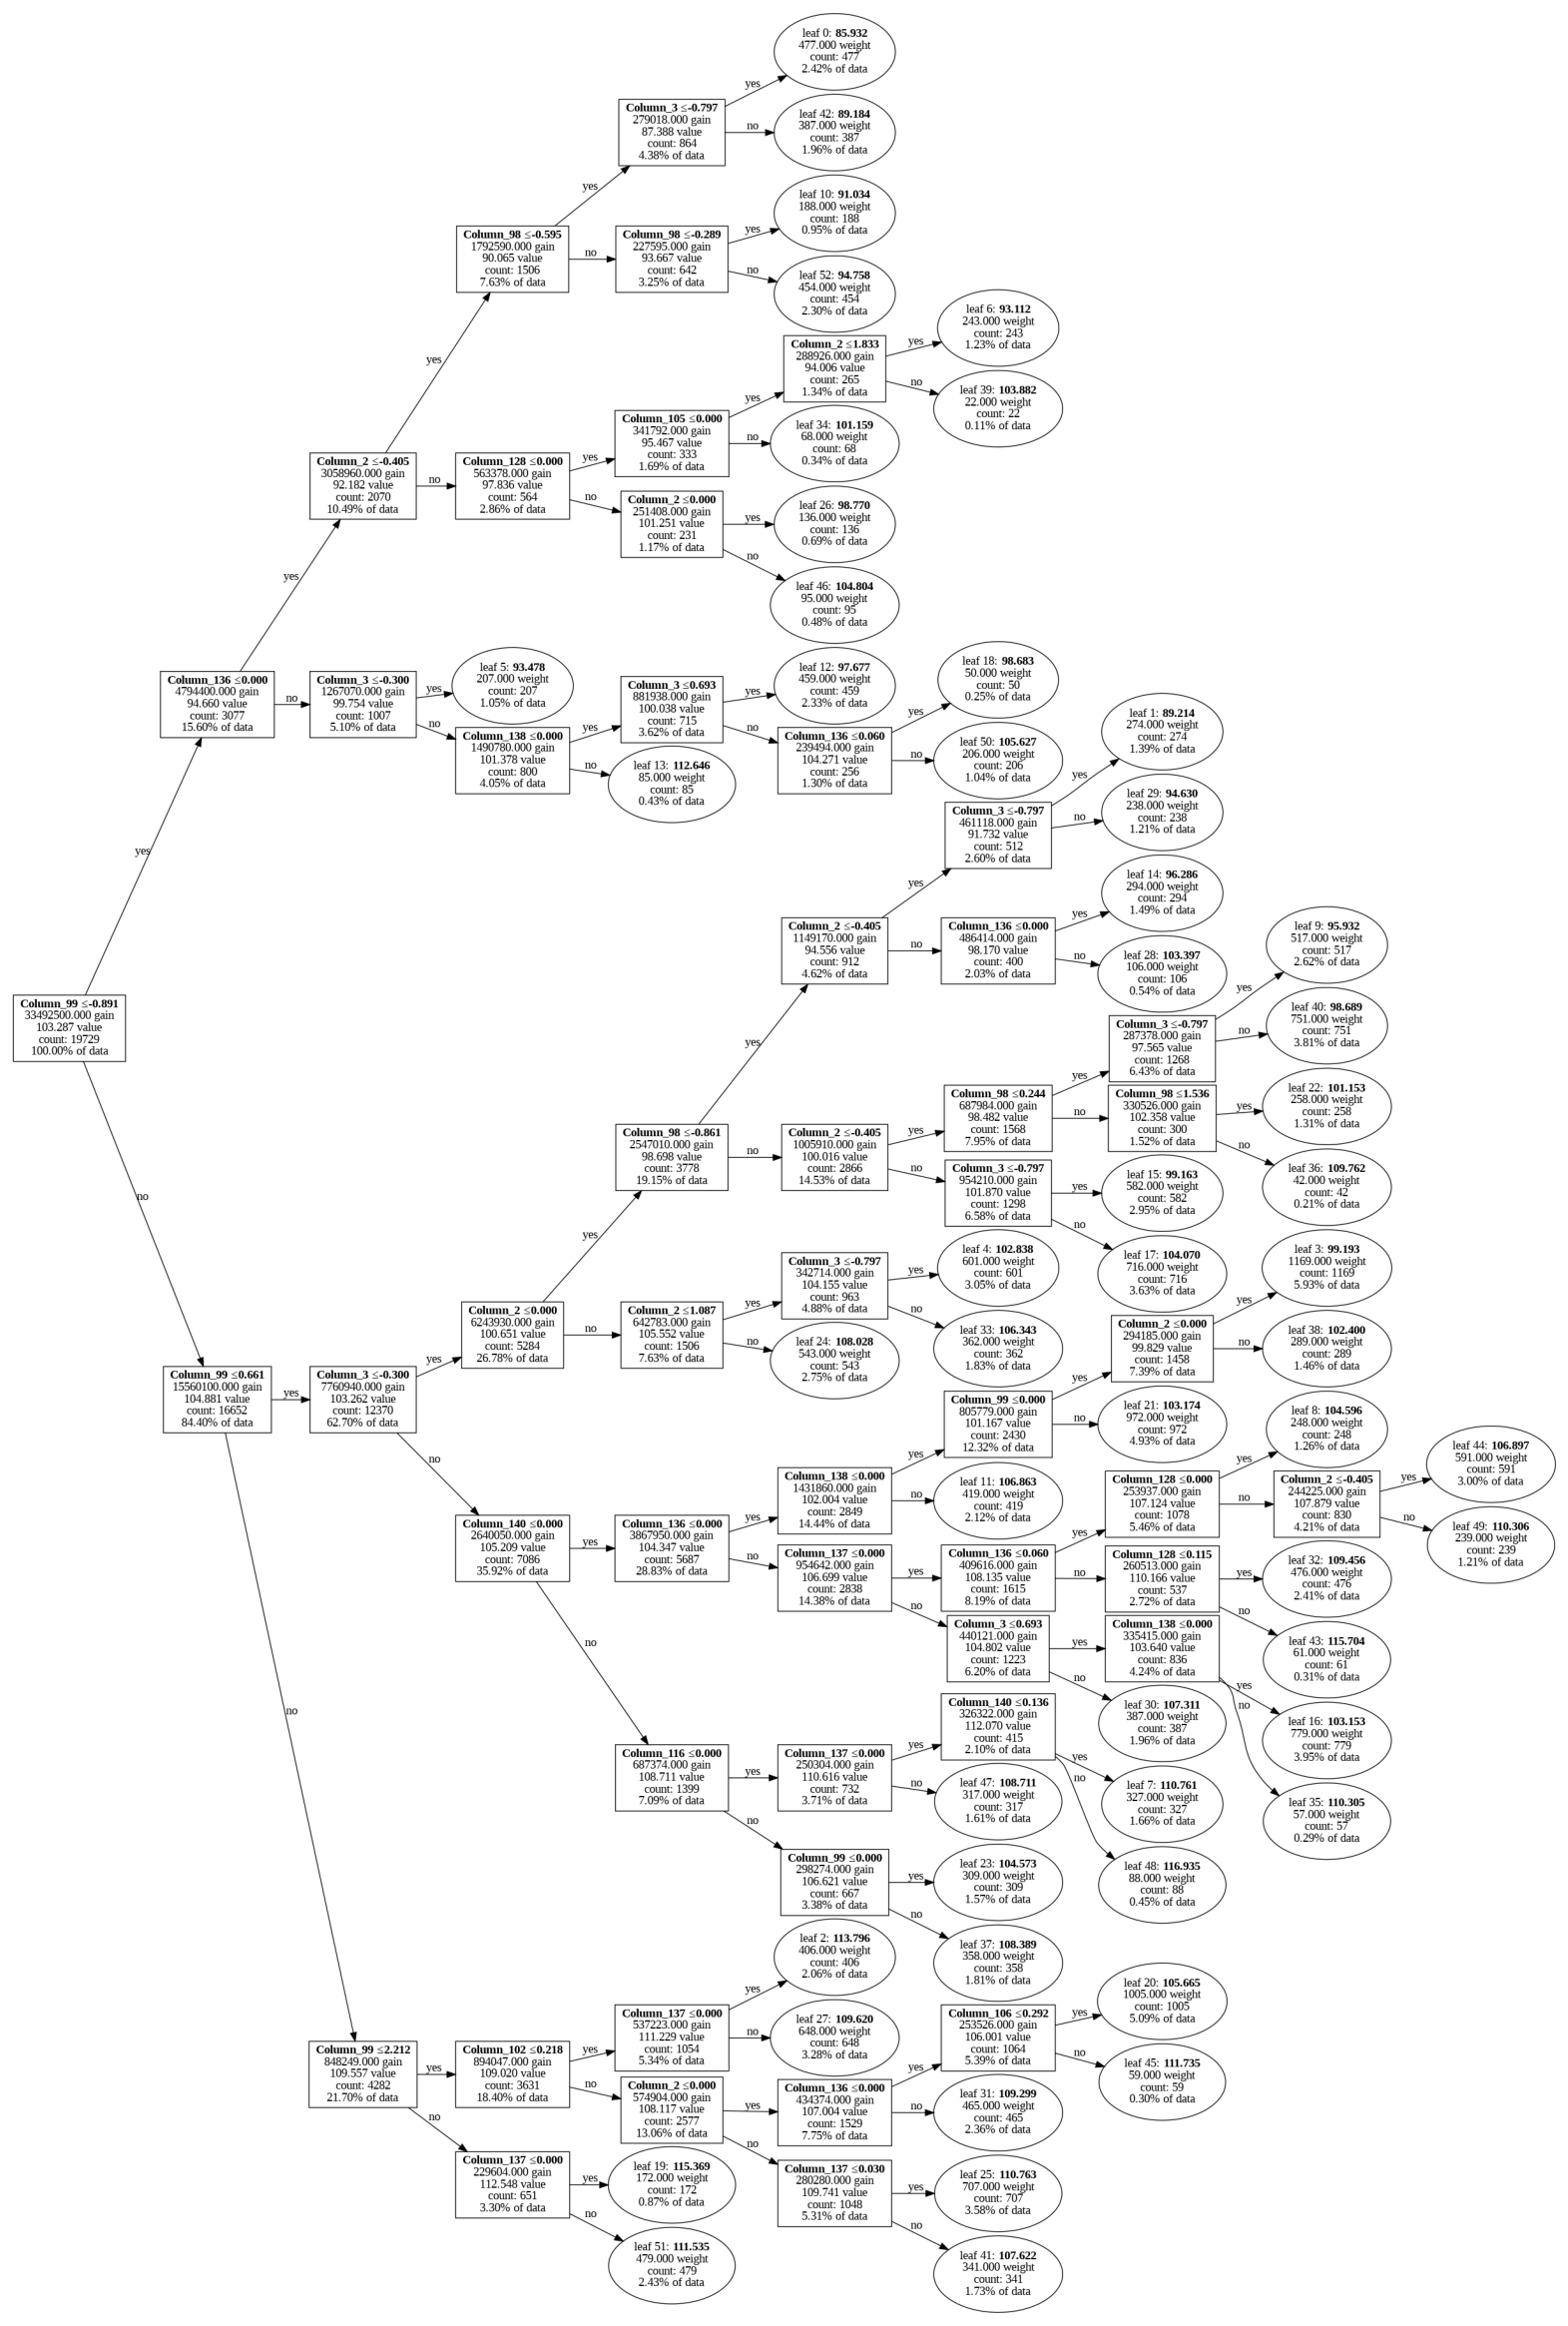

In [54]:
gbm = grid_search.best_estimator_.named_steps['regressor']

ax = lgb.plot_tree(gbm, tree_index=0, figsize=(30, 30), show_info=['split_gain', 'internal_value', 'internal_count', 'leaf_count', 'data_percentage', 'leaf_weight'])
plt.show()

In [55]:
!pip install joblib
import joblib
joblib.dump(grid_search.best_estimator_, 'best_full_data_model.joblib')



['best_full_data_model.joblib']